In [16]:
import os
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


In [17]:
import os
import tensorflow as tf

train_dir = 'data3a/training' 
val_dir = 'data3a/validation'

In [18]:
img_width, img_height = 150, 150

In [19]:
epoch = 1000
batch_size=32

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1383 images belonging to 3 classes.
Found 248 images belonging to 3 classes.


In [22]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense

inceptionv3_model = Sequential()
pretrained_model = InceptionV3(
    include_top=False,
    input_shape=(img_width, img_height, 3),
    pooling='max',
    classes=3,
    weights='imagenet'
)
for layer in pretrained_model.layers:
    layer.trainable=False
    
inceptionv3_model.add(pretrained_model)
inceptionv3_model.add(Flatten())
inceptionv3_model.add(Dense(128, activation='relu'))
# minor, moderate, and severe (3)
inceptionv3_model.add(Dense(3, activation='softmax'))

In [23]:
inceptionv3_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 22065443 (84.17 MB)
Trainable params: 262659 (1.00 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [31]:
from tensorflow.keras.callbacks import Callback

class custom_loss(Callback):
     def __init__(self, desired_loss):
        super(custom_loss, self).__init__()
        self.desired_loss = desired_loss
     def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        if current_loss <= self.desired_loss:
            print(f'Epoch {epoch+1}: Desired loss {self.desired_loss} reached. Stopping training.')
            self.model.stop_training = True

In [32]:
#Model compile
inceptionv3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
#Model Train 
import time 
start_time = time.time()

#custom loss callback
desired_loss_value = 0.01 
custom_loss_callback = custom_loss(desired_loss=desired_loss_value)

history = inceptionv3_model.fit(train_generator, epochs=epoch, validation_data=val_generator, callbacks=[custom_loss_callback])

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Total training time: {elapsed_time:.2f} seconds")


Epoch 1/1000
44/44 [==============================] - 26s 486ms/step - loss: 2.5230 - accuracy: 0.3666 - val_loss: 1.0173 - val_accuracy: 0.4798
Epoch 2/1000
44/44 [==============================] - 17s 393ms/step - loss: 0.9938 - accuracy: 0.5040 - val_loss: 0.8661 - val_accuracy: 0.5968
Epoch 3/1000
44/44 [==============================] - 16s 363ms/step - loss: 0.9246 - accuracy: 0.5372 - val_loss: 0.8555 - val_accuracy: 0.5524
Epoch 4/1000
44/44 [==============================] - 16s 361ms/step - loss: 0.9160 - accuracy: 0.5611 - val_loss: 0.7994 - val_accuracy: 0.6250
Epoch 5/1000
44/44 [==============================] - 16s 373ms/step - loss: 0.8864 - accuracy: 0.5633 - val_loss: 0.8414 - val_accuracy: 0.6169
Epoch 6/1000
44/44 [==============================] - 16s 365ms/step - loss: 0.8598 - accuracy: 0.5879 - val_loss: 0.7866 - val_accuracy: 0.6452
Epoch 7/1000
44/44 [==============================] - 16s 366ms/step - loss: 0.8634 - accuracy: 0.5806 - val_loss: 0.7645 - val_ac

44/44 [==============================] - 18s 400ms/step - loss: 0.7555 - accuracy: 0.6623 - val_loss: 0.6856 - val_accuracy: 0.7016
Epoch 58/1000
44/44 [==============================] - 17s 391ms/step - loss: 0.7361 - accuracy: 0.6493 - val_loss: 0.7023 - val_accuracy: 0.7137
Epoch 59/1000
44/44 [==============================] - 17s 387ms/step - loss: 0.7816 - accuracy: 0.6443 - val_loss: 0.7627 - val_accuracy: 0.6573
Epoch 60/1000
44/44 [==============================] - 17s 393ms/step - loss: 0.7605 - accuracy: 0.6537 - val_loss: 0.6647 - val_accuracy: 0.7298
Epoch 61/1000
44/44 [==============================] - 17s 385ms/step - loss: 0.7342 - accuracy: 0.6515 - val_loss: 0.6503 - val_accuracy: 0.7218
Epoch 62/1000
44/44 [==============================] - 17s 390ms/step - loss: 0.7707 - accuracy: 0.6428 - val_loss: 0.6733 - val_accuracy: 0.7137
Epoch 63/1000
44/44 [==============================] - 17s 392ms/step - loss: 0.7559 - accuracy: 0.6565 - val_loss: 0.6966 - val_accuracy:

44/44 [==============================] - 17s 393ms/step - loss: 0.7526 - accuracy: 0.6471 - val_loss: 0.6668 - val_accuracy: 0.6935
Epoch 114/1000
44/44 [==============================] - 17s 393ms/step - loss: 0.7454 - accuracy: 0.6479 - val_loss: 0.6578 - val_accuracy: 0.6895
Epoch 115/1000
44/44 [==============================] - 17s 388ms/step - loss: 0.7046 - accuracy: 0.6876 - val_loss: 0.6542 - val_accuracy: 0.7056
Epoch 116/1000
44/44 [==============================] - 17s 388ms/step - loss: 0.7318 - accuracy: 0.6717 - val_loss: 0.6673 - val_accuracy: 0.7258
Epoch 117/1000
44/44 [==============================] - 17s 388ms/step - loss: 0.7008 - accuracy: 0.6819 - val_loss: 0.6620 - val_accuracy: 0.7177
Epoch 118/1000
44/44 [==============================] - 17s 396ms/step - loss: 0.6983 - accuracy: 0.6761 - val_loss: 0.6465 - val_accuracy: 0.7097
Epoch 119/1000
44/44 [==============================] - 17s 393ms/step - loss: 0.7521 - accuracy: 0.6558 - val_loss: 0.6759 - val_acc

Epoch 169/1000
44/44 [==============================] - 17s 385ms/step - loss: 0.6812 - accuracy: 0.6898 - val_loss: 0.7192 - val_accuracy: 0.6653
Epoch 170/1000
44/44 [==============================] - 17s 395ms/step - loss: 0.6839 - accuracy: 0.6920 - val_loss: 0.7349 - val_accuracy: 0.6613
Epoch 171/1000
44/44 [==============================] - 17s 383ms/step - loss: 0.6760 - accuracy: 0.6891 - val_loss: 0.7944 - val_accuracy: 0.6008
Epoch 172/1000
44/44 [==============================] - 17s 387ms/step - loss: 0.6883 - accuracy: 0.6797 - val_loss: 0.6880 - val_accuracy: 0.6734
Epoch 173/1000
44/44 [==============================] - 17s 390ms/step - loss: 0.7033 - accuracy: 0.6717 - val_loss: 0.7576 - val_accuracy: 0.6452
Epoch 174/1000
44/44 [==============================] - 18s 396ms/step - loss: 0.6765 - accuracy: 0.6949 - val_loss: 0.7263 - val_accuracy: 0.6613
Epoch 175/1000
44/44 [==============================] - 17s 386ms/step - loss: 0.7089 - accuracy: 0.6855 - val_loss: 0

Epoch 225/1000
44/44 [==============================] - 18s 403ms/step - loss: 0.6629 - accuracy: 0.6949 - val_loss: 0.6936 - val_accuracy: 0.6573
Epoch 226/1000
44/44 [==============================] - 17s 385ms/step - loss: 0.6796 - accuracy: 0.6970 - val_loss: 0.6941 - val_accuracy: 0.7056
Epoch 227/1000
44/44 [==============================] - 17s 380ms/step - loss: 0.6954 - accuracy: 0.6905 - val_loss: 0.7021 - val_accuracy: 0.6694
Epoch 228/1000
44/44 [==============================] - 17s 393ms/step - loss: 0.6721 - accuracy: 0.6898 - val_loss: 0.6943 - val_accuracy: 0.6935
Epoch 229/1000
44/44 [==============================] - 17s 392ms/step - loss: 0.6714 - accuracy: 0.6898 - val_loss: 0.6915 - val_accuracy: 0.6935
Epoch 230/1000
44/44 [==============================] - 17s 391ms/step - loss: 0.6687 - accuracy: 0.6855 - val_loss: 0.7504 - val_accuracy: 0.6613
Epoch 231/1000
44/44 [==============================] - 17s 384ms/step - loss: 0.6779 - accuracy: 0.6927 - val_loss: 0

Epoch 281/1000
44/44 [==============================] - 18s 399ms/step - loss: 0.6499 - accuracy: 0.7086 - val_loss: 0.7017 - val_accuracy: 0.6774
Epoch 282/1000
44/44 [==============================] - 17s 387ms/step - loss: 0.6570 - accuracy: 0.7101 - val_loss: 0.6831 - val_accuracy: 0.6774
Epoch 283/1000
44/44 [==============================] - 17s 387ms/step - loss: 0.6655 - accuracy: 0.7072 - val_loss: 0.6890 - val_accuracy: 0.6895
Epoch 284/1000
44/44 [==============================] - 17s 392ms/step - loss: 0.6474 - accuracy: 0.6956 - val_loss: 0.6910 - val_accuracy: 0.6855
Epoch 285/1000
44/44 [==============================] - 18s 402ms/step - loss: 0.6615 - accuracy: 0.7028 - val_loss: 0.7078 - val_accuracy: 0.6855
Epoch 286/1000
44/44 [==============================] - 18s 398ms/step - loss: 0.6568 - accuracy: 0.7064 - val_loss: 0.7177 - val_accuracy: 0.6613
Epoch 287/1000
44/44 [==============================] - 17s 390ms/step - loss: 0.6536 - accuracy: 0.7223 - val_loss: 0

Epoch 337/1000
44/44 [==============================] - 27s 601ms/step - loss: 0.6586 - accuracy: 0.7050 - val_loss: 0.7513 - val_accuracy: 0.6734
Epoch 338/1000
44/44 [==============================] - 26s 588ms/step - loss: 0.6355 - accuracy: 0.7151 - val_loss: 0.7312 - val_accuracy: 0.6653
Epoch 339/1000
44/44 [==============================] - 20s 457ms/step - loss: 0.6360 - accuracy: 0.7296 - val_loss: 0.7104 - val_accuracy: 0.6895
Epoch 340/1000
44/44 [==============================] - 19s 437ms/step - loss: 0.6333 - accuracy: 0.7296 - val_loss: 0.7834 - val_accuracy: 0.6371
Epoch 341/1000
44/44 [==============================] - 21s 477ms/step - loss: 0.6396 - accuracy: 0.7195 - val_loss: 0.7137 - val_accuracy: 0.6371
Epoch 342/1000
44/44 [==============================] - 21s 468ms/step - loss: 0.6480 - accuracy: 0.7129 - val_loss: 0.7015 - val_accuracy: 0.6452
Epoch 343/1000
44/44 [==============================] - 19s 433ms/step - loss: 0.6639 - accuracy: 0.6978 - val_loss: 0

Epoch 393/1000
44/44 [==============================] - 20s 456ms/step - loss: 0.6408 - accuracy: 0.7144 - val_loss: 0.7091 - val_accuracy: 0.6694
Epoch 394/1000
44/44 [==============================] - 19s 430ms/step - loss: 0.6494 - accuracy: 0.7014 - val_loss: 0.7246 - val_accuracy: 0.6774
Epoch 395/1000
44/44 [==============================] - 21s 480ms/step - loss: 0.6521 - accuracy: 0.7086 - val_loss: 0.7084 - val_accuracy: 0.6694
Epoch 396/1000
44/44 [==============================] - 20s 456ms/step - loss: 0.6574 - accuracy: 0.7043 - val_loss: 0.7841 - val_accuracy: 0.6290
Epoch 397/1000
44/44 [==============================] - 19s 441ms/step - loss: 0.6665 - accuracy: 0.7151 - val_loss: 0.7609 - val_accuracy: 0.6573
Epoch 398/1000
44/44 [==============================] - 18s 410ms/step - loss: 0.6254 - accuracy: 0.7245 - val_loss: 0.7454 - val_accuracy: 0.6573
Epoch 399/1000
44/44 [==============================] - 18s 413ms/step - loss: 0.6451 - accuracy: 0.6999 - val_loss: 0

Epoch 449/1000
44/44 [==============================] - 18s 407ms/step - loss: 0.6328 - accuracy: 0.7173 - val_loss: 0.7386 - val_accuracy: 0.6653
Epoch 450/1000
44/44 [==============================] - 18s 410ms/step - loss: 0.6377 - accuracy: 0.7195 - val_loss: 0.7268 - val_accuracy: 0.6694
Epoch 451/1000
44/44 [==============================] - 19s 423ms/step - loss: 0.6330 - accuracy: 0.7216 - val_loss: 0.7124 - val_accuracy: 0.6694
Epoch 452/1000
44/44 [==============================] - 18s 412ms/step - loss: 0.6307 - accuracy: 0.7245 - val_loss: 0.7353 - val_accuracy: 0.6734
Epoch 453/1000
44/44 [==============================] - 18s 413ms/step - loss: 0.6647 - accuracy: 0.7093 - val_loss: 0.7301 - val_accuracy: 0.6734
Epoch 454/1000
44/44 [==============================] - 18s 410ms/step - loss: 0.6374 - accuracy: 0.7187 - val_loss: 0.7077 - val_accuracy: 0.6694
Epoch 455/1000
44/44 [==============================] - 18s 413ms/step - loss: 0.6333 - accuracy: 0.7231 - val_loss: 0

Epoch 505/1000
44/44 [==============================] - 18s 414ms/step - loss: 0.6216 - accuracy: 0.7238 - val_loss: 0.7223 - val_accuracy: 0.6774
Epoch 506/1000
44/44 [==============================] - 18s 408ms/step - loss: 0.6433 - accuracy: 0.7101 - val_loss: 0.7455 - val_accuracy: 0.6573
Epoch 507/1000
44/44 [==============================] - 18s 418ms/step - loss: 0.6456 - accuracy: 0.7151 - val_loss: 0.7665 - val_accuracy: 0.6371
Epoch 508/1000
44/44 [==============================] - 19s 421ms/step - loss: 0.6441 - accuracy: 0.7057 - val_loss: 0.8123 - val_accuracy: 0.6250
Epoch 509/1000
44/44 [==============================] - 18s 406ms/step - loss: 0.6316 - accuracy: 0.7187 - val_loss: 0.7038 - val_accuracy: 0.6694
Epoch 510/1000
44/44 [==============================] - 18s 416ms/step - loss: 0.6581 - accuracy: 0.7072 - val_loss: 0.7105 - val_accuracy: 0.6532
Epoch 511/1000
44/44 [==============================] - 18s 412ms/step - loss: 0.6258 - accuracy: 0.7195 - val_loss: 0

Epoch 561/1000
44/44 [==============================] - 19s 419ms/step - loss: 0.6389 - accuracy: 0.7014 - val_loss: 0.7468 - val_accuracy: 0.6653
Epoch 562/1000
44/44 [==============================] - 19s 425ms/step - loss: 0.6493 - accuracy: 0.7050 - val_loss: 0.7884 - val_accuracy: 0.6331
Epoch 563/1000
44/44 [==============================] - 18s 418ms/step - loss: 0.6115 - accuracy: 0.7390 - val_loss: 0.7367 - val_accuracy: 0.6694
Epoch 564/1000
44/44 [==============================] - 18s 419ms/step - loss: 0.6153 - accuracy: 0.7346 - val_loss: 0.7209 - val_accuracy: 0.6774
Epoch 565/1000
44/44 [==============================] - 19s 421ms/step - loss: 0.6191 - accuracy: 0.7166 - val_loss: 0.7169 - val_accuracy: 0.6734
Epoch 566/1000
44/44 [==============================] - 19s 434ms/step - loss: 0.6322 - accuracy: 0.7223 - val_loss: 0.7378 - val_accuracy: 0.6613
Epoch 567/1000
44/44 [==============================] - 19s 423ms/step - loss: 0.6346 - accuracy: 0.7158 - val_loss: 0

Epoch 617/1000
44/44 [==============================] - 21s 481ms/step - loss: 0.6454 - accuracy: 0.7064 - val_loss: 0.7979 - val_accuracy: 0.6169
Epoch 618/1000
44/44 [==============================] - 19s 420ms/step - loss: 0.6544 - accuracy: 0.7101 - val_loss: 0.7583 - val_accuracy: 0.6250
Epoch 619/1000
44/44 [==============================] - 19s 420ms/step - loss: 0.6340 - accuracy: 0.7260 - val_loss: 0.6962 - val_accuracy: 0.6815
Epoch 620/1000
44/44 [==============================] - 19s 420ms/step - loss: 0.6591 - accuracy: 0.7086 - val_loss: 0.7728 - val_accuracy: 0.6734
Epoch 621/1000
44/44 [==============================] - 18s 417ms/step - loss: 0.6357 - accuracy: 0.7144 - val_loss: 0.7200 - val_accuracy: 0.6815
Epoch 622/1000
44/44 [==============================] - 19s 420ms/step - loss: 0.6313 - accuracy: 0.7093 - val_loss: 0.7721 - val_accuracy: 0.6532
Epoch 623/1000
44/44 [==============================] - 18s 417ms/step - loss: 0.6342 - accuracy: 0.7310 - val_loss: 0

Epoch 673/1000
44/44 [==============================] - 19s 421ms/step - loss: 0.6257 - accuracy: 0.7216 - val_loss: 0.7435 - val_accuracy: 0.6815
Epoch 674/1000
44/44 [==============================] - 19s 424ms/step - loss: 0.6308 - accuracy: 0.7079 - val_loss: 0.7514 - val_accuracy: 0.6532
Epoch 675/1000
44/44 [==============================] - 18s 418ms/step - loss: 0.6232 - accuracy: 0.7245 - val_loss: 0.7286 - val_accuracy: 0.6694
Epoch 676/1000
44/44 [==============================] - 19s 425ms/step - loss: 0.6432 - accuracy: 0.7079 - val_loss: 0.7384 - val_accuracy: 0.6774
Epoch 677/1000
44/44 [==============================] - 19s 425ms/step - loss: 0.6379 - accuracy: 0.7072 - val_loss: 0.7373 - val_accuracy: 0.6774
Epoch 678/1000
44/44 [==============================] - 18s 418ms/step - loss: 0.6293 - accuracy: 0.7115 - val_loss: 0.7168 - val_accuracy: 0.6935
Epoch 679/1000
44/44 [==============================] - 19s 419ms/step - loss: 0.6384 - accuracy: 0.7122 - val_loss: 0

Epoch 729/1000
44/44 [==============================] - 19s 430ms/step - loss: 0.6302 - accuracy: 0.7122 - val_loss: 0.7533 - val_accuracy: 0.6694
Epoch 730/1000
44/44 [==============================] - 19s 429ms/step - loss: 0.6209 - accuracy: 0.7252 - val_loss: 0.8009 - val_accuracy: 0.6290
Epoch 731/1000
44/44 [==============================] - 19s 430ms/step - loss: 0.6369 - accuracy: 0.7202 - val_loss: 0.7743 - val_accuracy: 0.6452
Epoch 732/1000
44/44 [==============================] - 19s 425ms/step - loss: 0.6264 - accuracy: 0.7216 - val_loss: 0.8627 - val_accuracy: 0.5726
Epoch 733/1000
44/44 [==============================] - 19s 431ms/step - loss: 0.6388 - accuracy: 0.7303 - val_loss: 0.7755 - val_accuracy: 0.6250
Epoch 734/1000
44/44 [==============================] - 19s 428ms/step - loss: 0.6614 - accuracy: 0.6985 - val_loss: 0.7657 - val_accuracy: 0.6210
Epoch 735/1000
44/44 [==============================] - 19s 428ms/step - loss: 0.6260 - accuracy: 0.7383 - val_loss: 0

Epoch 785/1000
44/44 [==============================] - 19s 431ms/step - loss: 0.6276 - accuracy: 0.7267 - val_loss: 0.7639 - val_accuracy: 0.6411
Epoch 786/1000
44/44 [==============================] - 18s 414ms/step - loss: 0.6388 - accuracy: 0.7274 - val_loss: 0.7407 - val_accuracy: 0.6653
Epoch 787/1000
44/44 [==============================] - 18s 403ms/step - loss: 0.6037 - accuracy: 0.7303 - val_loss: 0.7070 - val_accuracy: 0.7097
Epoch 788/1000
44/44 [==============================] - 18s 409ms/step - loss: 0.5915 - accuracy: 0.7426 - val_loss: 0.7595 - val_accuracy: 0.6371
Epoch 789/1000
44/44 [==============================] - 18s 403ms/step - loss: 0.6100 - accuracy: 0.7158 - val_loss: 0.7512 - val_accuracy: 0.6653
Epoch 790/1000
44/44 [==============================] - 18s 416ms/step - loss: 0.6222 - accuracy: 0.7281 - val_loss: 0.7269 - val_accuracy: 0.6734
Epoch 791/1000
44/44 [==============================] - 18s 404ms/step - loss: 0.6015 - accuracy: 0.7274 - val_loss: 0

Epoch 841/1000
44/44 [==============================] - 18s 408ms/step - loss: 0.6156 - accuracy: 0.7339 - val_loss: 0.7446 - val_accuracy: 0.6532
Epoch 842/1000
44/44 [==============================] - 18s 410ms/step - loss: 0.6124 - accuracy: 0.7245 - val_loss: 0.7995 - val_accuracy: 0.6331
Epoch 843/1000
44/44 [==============================] - 18s 405ms/step - loss: 0.6239 - accuracy: 0.7310 - val_loss: 0.7351 - val_accuracy: 0.6815
Epoch 844/1000
44/44 [==============================] - 18s 414ms/step - loss: 0.6278 - accuracy: 0.7252 - val_loss: 0.7249 - val_accuracy: 0.6855
Epoch 845/1000
44/44 [==============================] - 18s 407ms/step - loss: 0.5915 - accuracy: 0.7455 - val_loss: 0.7939 - val_accuracy: 0.6452
Epoch 846/1000
44/44 [==============================] - 18s 407ms/step - loss: 0.6351 - accuracy: 0.7173 - val_loss: 0.7875 - val_accuracy: 0.6411
Epoch 847/1000
44/44 [==============================] - 19s 423ms/step - loss: 0.6193 - accuracy: 0.7303 - val_loss: 0

Epoch 897/1000
44/44 [==============================] - 18s 400ms/step - loss: 0.6263 - accuracy: 0.7195 - val_loss: 0.7798 - val_accuracy: 0.6290
Epoch 898/1000
44/44 [==============================] - 18s 403ms/step - loss: 0.6019 - accuracy: 0.7289 - val_loss: 0.7970 - val_accuracy: 0.6371
Epoch 899/1000
44/44 [==============================] - 18s 409ms/step - loss: 0.6175 - accuracy: 0.7093 - val_loss: 0.8103 - val_accuracy: 0.6290
Epoch 900/1000
44/44 [==============================] - 18s 416ms/step - loss: 0.6327 - accuracy: 0.7180 - val_loss: 0.7704 - val_accuracy: 0.6452
Epoch 901/1000
44/44 [==============================] - 18s 411ms/step - loss: 0.6117 - accuracy: 0.7368 - val_loss: 0.7768 - val_accuracy: 0.6613
Epoch 902/1000
44/44 [==============================] - 18s 407ms/step - loss: 0.6336 - accuracy: 0.7137 - val_loss: 0.7507 - val_accuracy: 0.6734
Epoch 903/1000
44/44 [==============================] - 18s 407ms/step - loss: 0.6118 - accuracy: 0.7209 - val_loss: 0

Epoch 953/1000
44/44 [==============================] - 18s 407ms/step - loss: 0.6362 - accuracy: 0.7093 - val_loss: 0.7225 - val_accuracy: 0.6895
Epoch 954/1000
44/44 [==============================] - 18s 404ms/step - loss: 0.6331 - accuracy: 0.7223 - val_loss: 0.7363 - val_accuracy: 0.6694
Epoch 955/1000
44/44 [==============================] - 18s 402ms/step - loss: 0.6057 - accuracy: 0.7310 - val_loss: 0.7711 - val_accuracy: 0.6411
Epoch 956/1000
44/44 [==============================] - 18s 401ms/step - loss: 0.5994 - accuracy: 0.7354 - val_loss: 0.7504 - val_accuracy: 0.6855
Epoch 957/1000
44/44 [==============================] - 18s 416ms/step - loss: 0.6149 - accuracy: 0.7252 - val_loss: 0.7653 - val_accuracy: 0.6694
Epoch 958/1000
44/44 [==============================] - 18s 406ms/step - loss: 0.6140 - accuracy: 0.7310 - val_loss: 0.7698 - val_accuracy: 0.6734
Epoch 959/1000
44/44 [==============================] - 18s 409ms/step - loss: 0.6252 - accuracy: 0.7223 - val_loss: 0

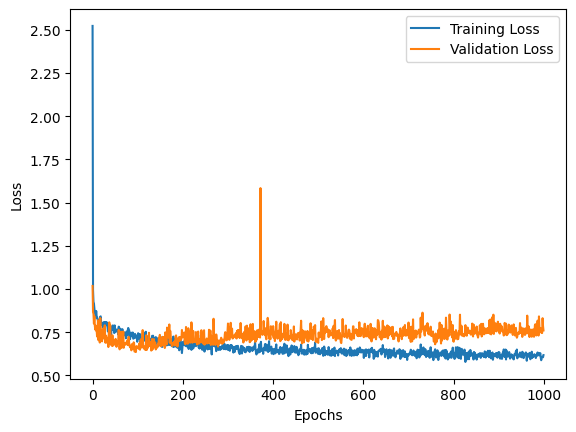

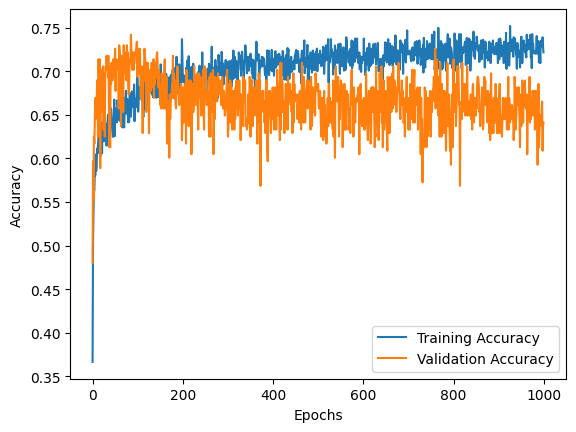

In [37]:
import matplotlib.pyplot as plt

# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


8/8 [==============================] - 5s 389ms/step
Confusion Matrix:


C:\Users\sandi\AppData\Local\Temp\ipykernel_15280\3193068026.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45) #predicted
C:\Users\sandi\AppData\Local\Temp\ipykernel_15280\3193068026.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['minor', 'moderate', 'severe']) #actual


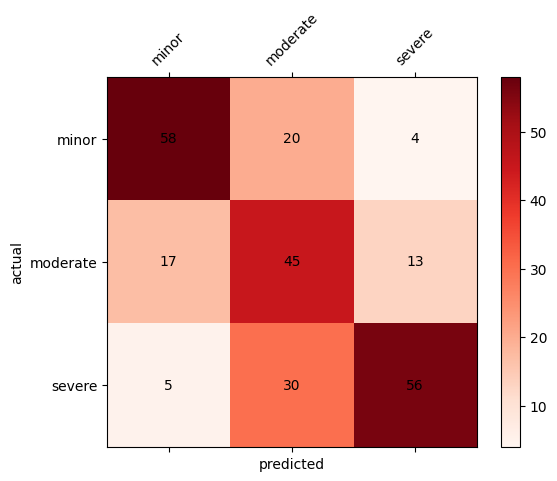

Classification Report:
              precision    recall  f1-score   support

    01-minor       0.72      0.71      0.72        82
 02-moderate       0.47      0.60      0.53        75
   03-severe       0.77      0.62      0.68        91

    accuracy                           0.64       248
   macro avg       0.66      0.64      0.64       248
weighted avg       0.66      0.64      0.65       248



In [38]:
import numpy as np
val_images, val_labels = [], []
class_names = sorted(train_generator.class_indices.keys())
for i in range(len(val_generator)):
    images, labels = val_generator[i]
    val_images.extend(images)
    val_labels.extend(np.argmax(labels, axis=1))

val_images = np.array(val_images)
val_labels = np.array(val_labels)

predictions = inceptionv3_model.predict(val_images)

y_pred = np.argmax(predictions, axis=1)
y_true = val_labels

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap='Reds')

cbar = fig.colorbar(cax)

ax.set_xlabel('predicted') #predicted
ax.set_ylabel('actual') #actual

ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45) #predicted
ax.set_yticklabels([''] + ['minor', 'moderate', 'severe']) #actual

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')
print('Confusion Matrix:')

plt.show()

report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification Report:')
print(report)

In [17]:
inceptionv3_model.save('inceptionv3-model.keras')
print('model saved')

model saved


1/1 [==============================] - 0s 55ms/step


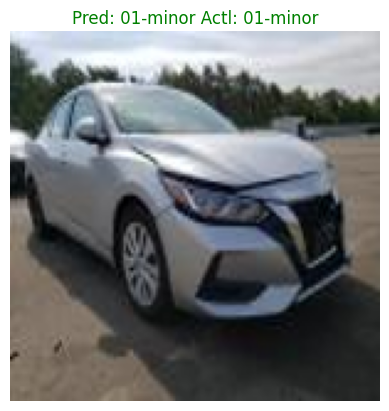

1/1 [==============================] - 0s 56ms/step


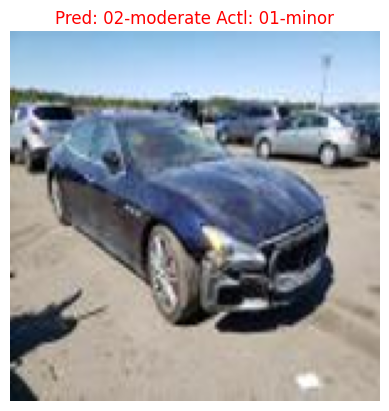

1/1 [==============================] - 0s 48ms/step


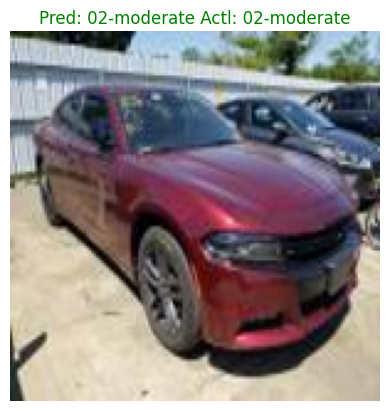

1/1 [==============================] - 0s 49ms/step


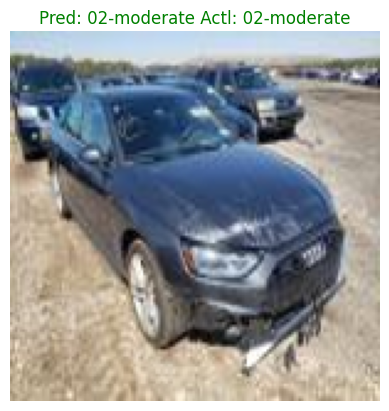

1/1 [==============================] - 0s 47ms/step


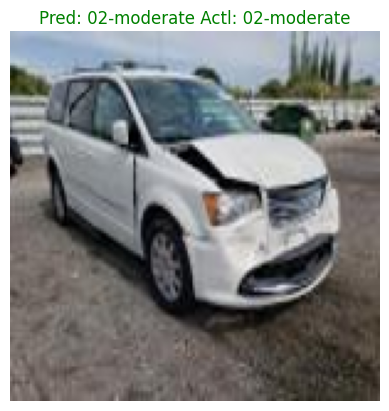

1/1 [==============================] - 0s 56ms/step


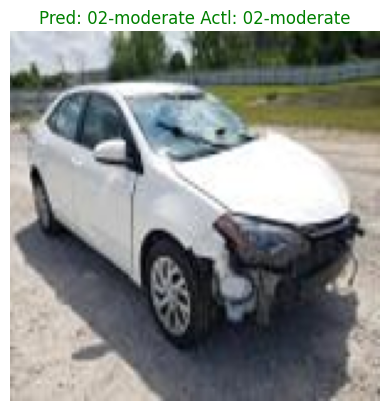

1/1 [==============================] - 0s 48ms/step


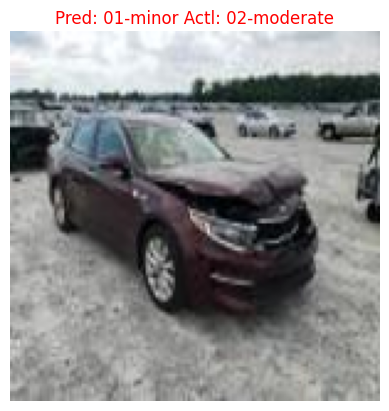

1/1 [==============================] - 0s 48ms/step


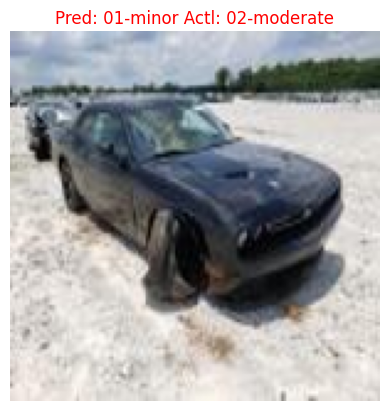

1/1 [==============================] - 0s 50ms/step


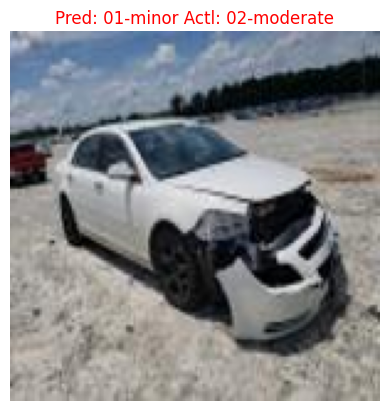

1/1 [==============================] - 0s 58ms/step


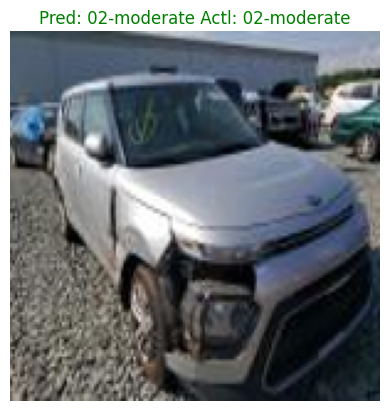

1/1 [==============================] - 0s 50ms/step


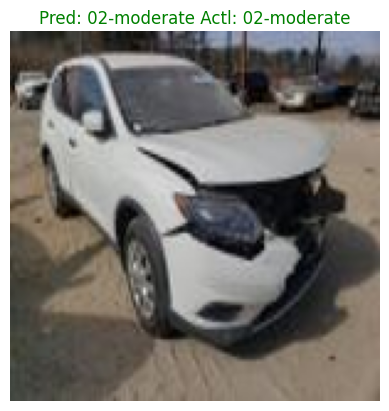

1/1 [==============================] - 0s 50ms/step


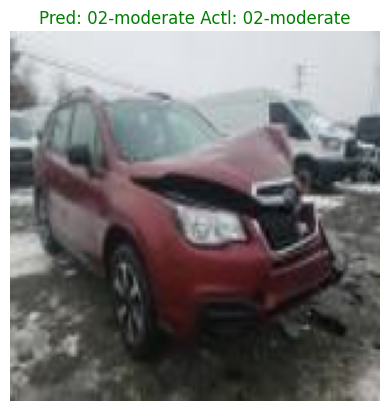

1/1 [==============================] - 0s 57ms/step


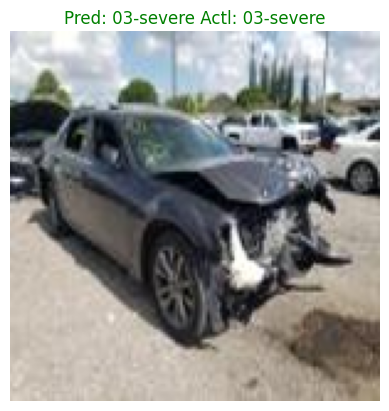

1/1 [==============================] - 0s 60ms/step


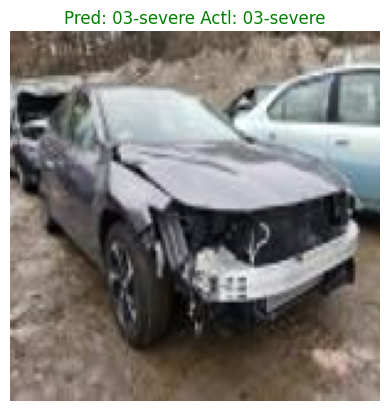

1/1 [==============================] - 0s 64ms/step


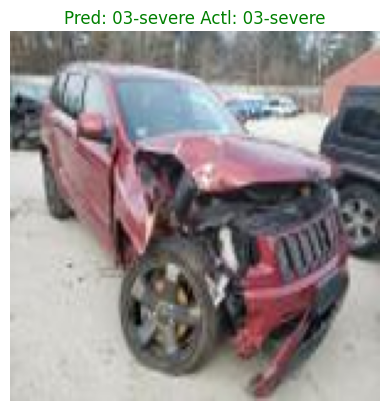

1/1 [==============================] - 0s 60ms/step


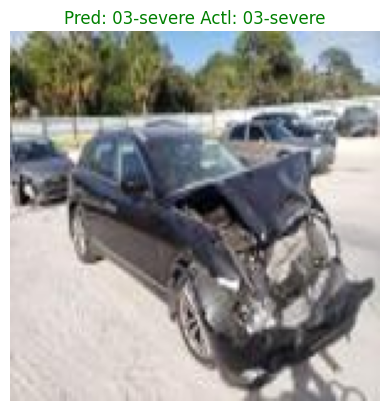

1/1 [==============================] - 0s 53ms/step


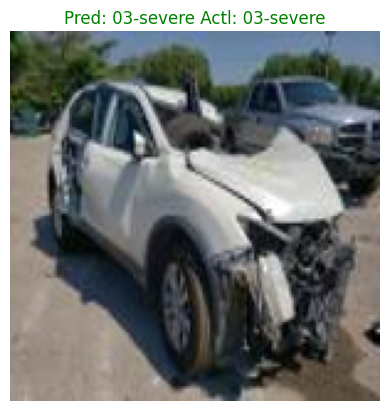

1/1 [==============================] - 0s 50ms/step


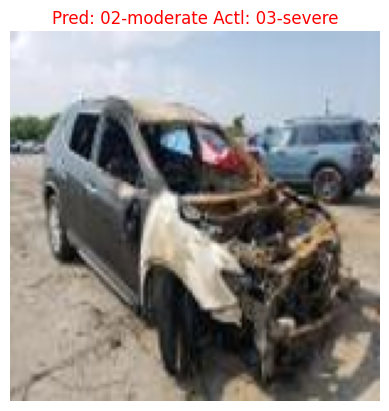

1/1 [==============================] - 0s 62ms/step


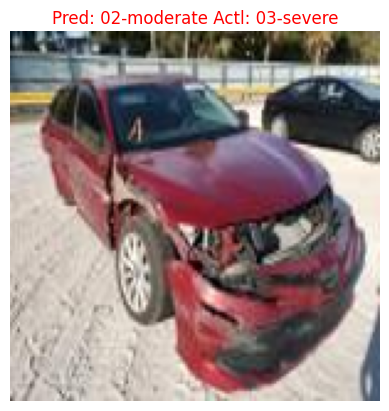

1/1 [==============================] - 0s 51ms/step


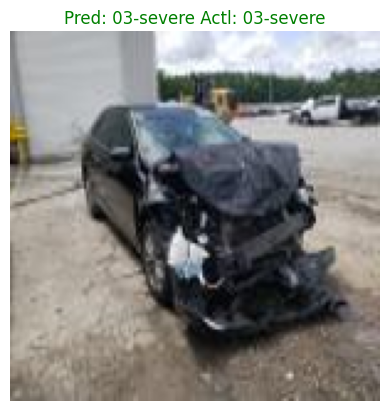

1/1 [==============================] - 0s 48ms/step


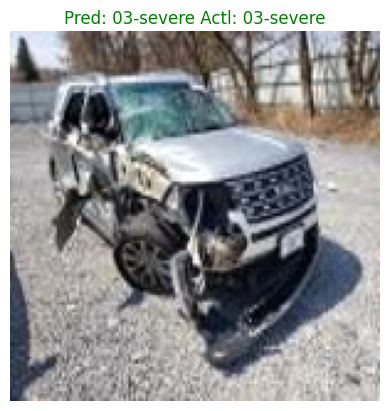

1/1 [==============================] - 0s 57ms/step


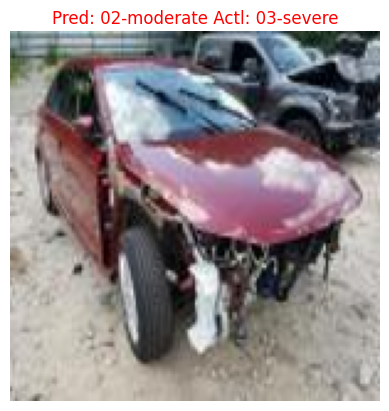

False: 7
True: 15


In [39]:
val_dir = 'data3a/validation'
class_names = ["01-minor", "02-moderate", "03-severe"]

image_paths = []
for class_name in class_names:
    folder_path = os.path.join(val_dir, class_name)
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(folder_path, filename))
negative = 0
positive = 0
for image_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = img.resize((img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    pred = inceptionv3_model.predict(img)
    pred_label = class_names[np.argmax(pred)]
    folder_name = os.path.basename(os.path.dirname(image_path))
    plt.imshow(img[0])
    if (pred_label != folder_name):
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'red')
        negative+=1
    else:
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'green')
        positive+=1
   
    plt.axis('off')
    plt.show() 
print('False: '+ str(negative) + '\nTrue: ' + str(positive))